In [23]:
library(factoextra)
library(ggbiplot)
# biplot

In [24]:
# load data
data(iris)
head(iris,3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


In [25]:
# log transform 
log.ir <- log(iris[, 1:4])
ir.species <- iris[, 5]

In [26]:
# apply PCA - scale. = TRUE is highly
ir.pca <- prcomp(log.ir,
                center = TRUE,
                scale. = TRUE)

In [27]:
# print method 
print(ir.pca)

Standard deviations (1, .., p=4):
[1] 1.7124583 0.9523797 0.3647029 0.1656840

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3         PC4
Sepal.Length  0.5038236 -0.45499872  0.7088547  0.19147575
Sepal.Width  -0.3023682 -0.88914419 -0.3311628 -0.09125405
Petal.Length  0.5767881 -0.03378802 -0.2192793 -0.78618732
Petal.Width   0.5674952 -0.03545628 -0.5829003  0.58044745


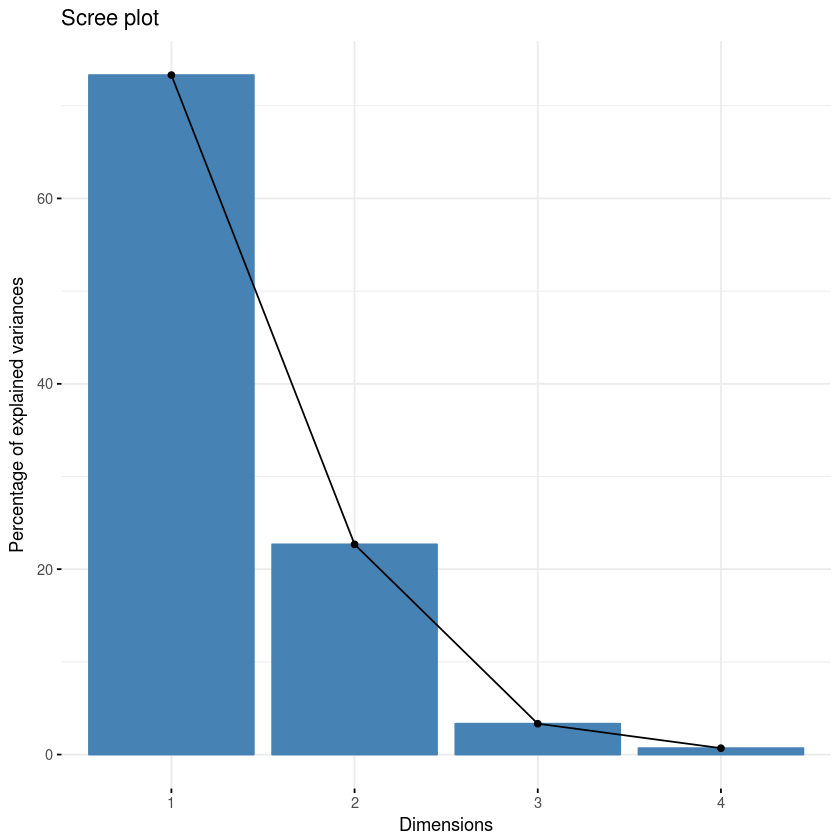

In [28]:
# plot method
fviz_eig(ir.pca)

In [29]:
summary(ir.pca, newdata=tail(log.ir, 2))

Warning message:
“In summary.prcomp(ir.pca, newdata = tail(log.ir, 2)) :
 extra argument ‘newdata’ will be disregarded”

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7125 0.9524 0.36470 0.16568
Proportion of Variance 0.7331 0.2268 0.03325 0.00686
Cumulative Proportion  0.7331 0.9599 0.99314 1.00000

In [30]:
# predict pcs
predict(ir.pca, 
       newdata=tail(log.ir, 2))

,PC1,PC2,PC3,PC4
149,1.0809930,-1.01155751,-0.7082289,-0.06811063
150,0.9712116,-0.06158655,-0.5008674,-0.12411524


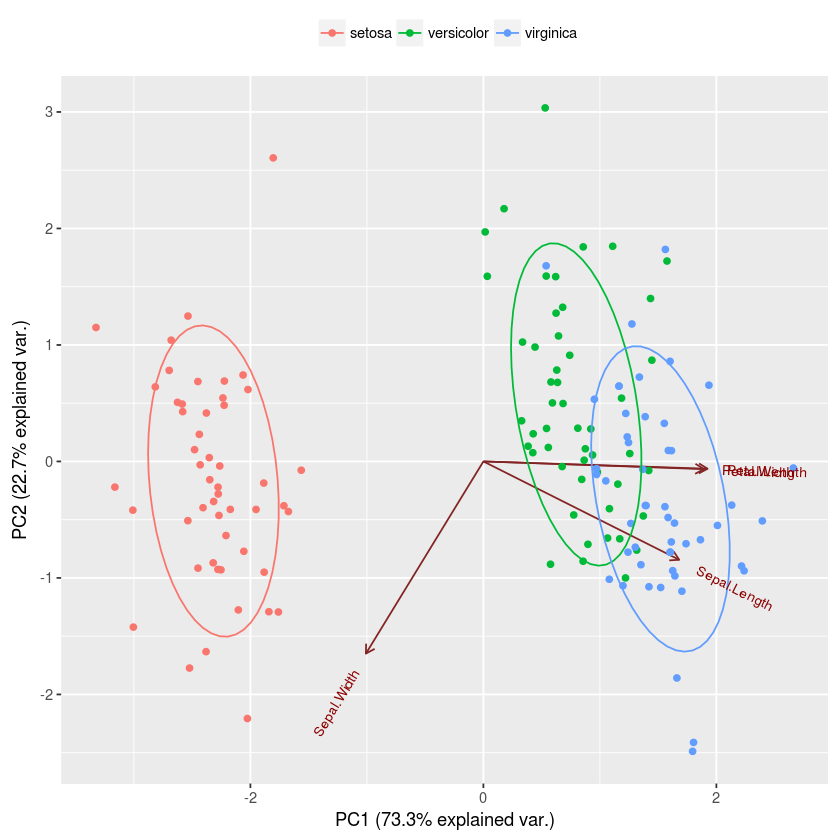

In [31]:
g <- ggbiplot(ir.pca, obs.scale=1, var.scale=1, groups=ir.species, ellipse=TRUE, circle=FALSE)
g <- g + scale_color_discrete(name='')
g <- g + theme(legend.direction='horizontal', legend.position='top')
print(g)

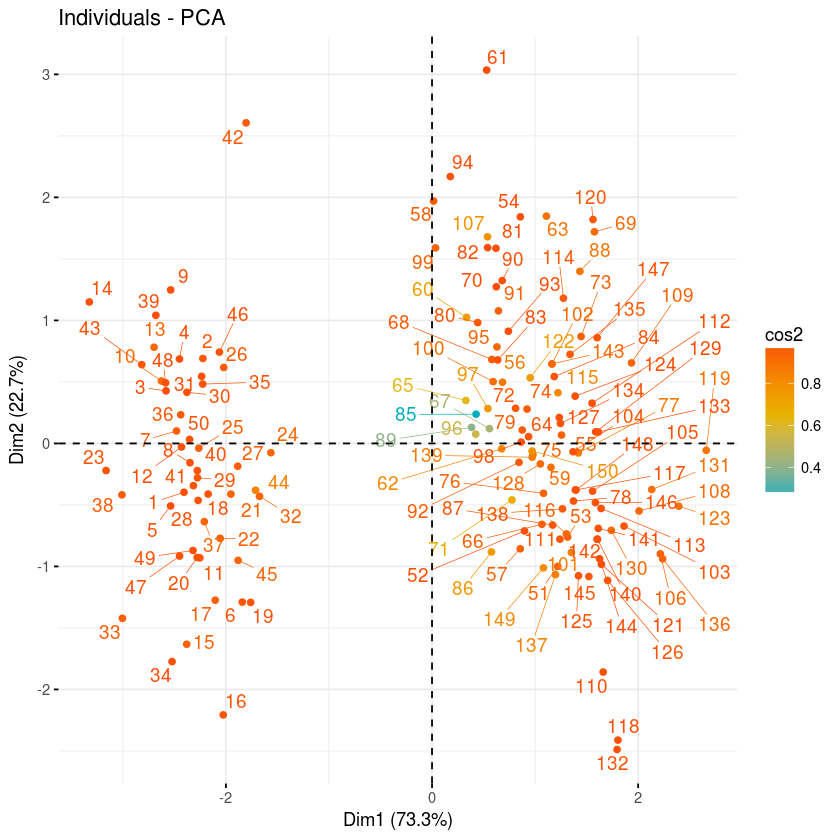

In [32]:
# Graph of individuals. Individuals with a similar profile are grouped together.
fviz_pca_ind(ir.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

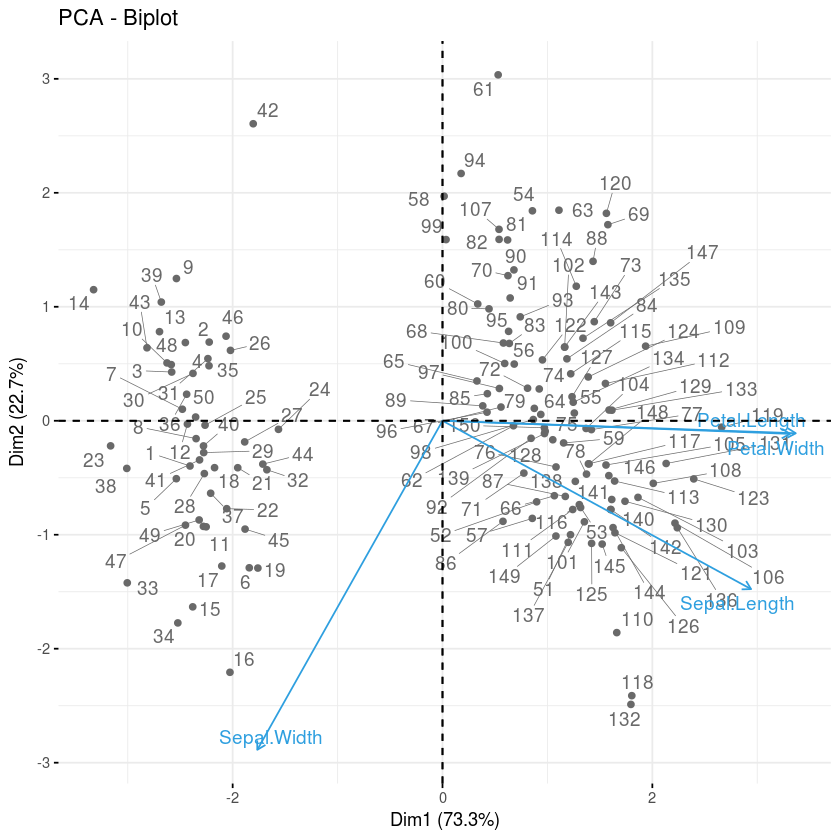

In [33]:
# biplot of individuals and variables
fviz_pca_biplot(ir.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )